**Statement of Problem **

Students often face a lot of challenges when appying to universities for a Masters' degree program. This challenges include, not obtaining admission after a period of waiting between submitting their application and hearing back from the university. As a data scientist, develop a machine learning model that uses decision trees to predict the chances of students getting admitted for a masters degree program based on their scores as presented in the data.



**Data Source**: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019


**Solution **

For the problem to be solved, I will now proceed to import some python librlibraries. Pandas will be used for data structures and analysis. NumPy will be used for computing with array objects. SciKit-learn for processing and predictions. Matplotlib will be used for plotting and Seaborn will be used for visualization.



In [ ]:
#importing phyton liblibraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset and printing the head

admissions_df=pd.read_csv("Admission_Predict_Ver1.1.csv")
print(admissions_df.head)

<bound method NDFrame.head of      Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
..          ...        ...          ...  ...   ...       ...               ...
495         496        332          108  ...  9.02         1              0.87
496         497        337          117  ...  9.87         1              0.96
497         498        330          120  ...  9.56         1              0.93
498         499        312          103  ...  8.43         0              0.73
499         500        327          113  ...  9.04         0              0.84

[500 rows x 9 columns

In [ ]:
type(admissions_df)

pandas.core.frame.DataFrame

In [ ]:
admissions_df.shape

(500, 9)

In [ ]:
!pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
admissions_df_report=sv.analyze(admissions_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [ ]:
admissions_df_report.show_html

<bound method DataframeReport.show_html of <sweetviz.dataframe_report.DataframeReport object at 0x7f8837da72b0>>

**Observation**
The imported data file shows no data for the 'research' column and the 'chance of admit' column. Further investigation into the data is required to ensure that the data have been imported.

'GRE score' contains numeric data (integer/ratio).
'TOEFL score' contains numeric data (ingeter/ratio).
'university rating' contains numeric (integer/ratio) data.
'statement of purpose (sop)' contains numeric data(integer/ratio).
'letter of recomendation' contains numeric data(integer/ratio)
'CGPA' contains numeric data (integer/ratio)


In [ ]:
#checking for missing values

count_nan=admissions_df.isnull().sum()
print(count_nan[count_nan>0])

Series([], dtype: int64)


In [ ]:
#since the column 'Research' is not displaying any data, this stage is just checking that the data is there
print(admissions_df['Research'])

0      1
1      1
2      1
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    0
Name: Research, Length: 500, dtype: int64


In [ ]:
#since the column 'Chance of Admit' is not displaying any data, this stage is just checking that the data is there
print(admissions_df['Chance of Admit '])

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64


In [ ]:
admissions_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
#for easy analysis, the column names would be changed. 
admissions_df_new = admissions_df.rename(columns={'Serial No.': 'SN',
                                                  'GRE Score' : 'GRE_SC',
                                                  'TOEFL Score' : 'TOEFL_SC',
                                                  'University Rating': 'Uni_rate',
                                                  'Chance of Admit ': 'Chance_of_admit',
                                                  'LOR ': 'LOR'})

In [ ]:
admissions_df_new.head()

,SN,GRE_SC,TOEFL_SC,Uni_rate,SOP,LOR,CGPA,Research,Chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


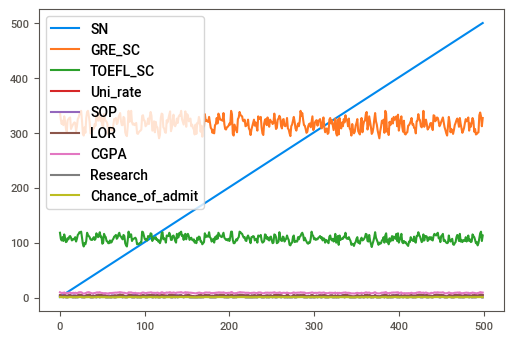

In [ ]:
admissions_df_new.plot()

**Data Visualization **

This section shows all the data in graphical forms.

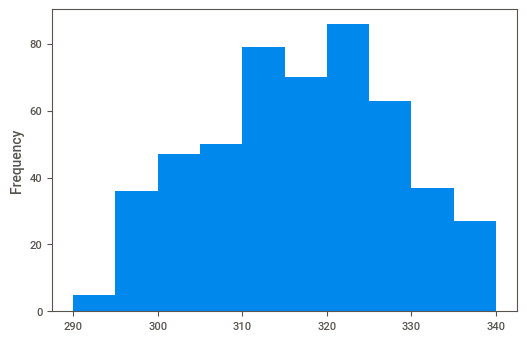

In [ ]:

admissions_df_new['GRE_SC'].plot(kind="hist")

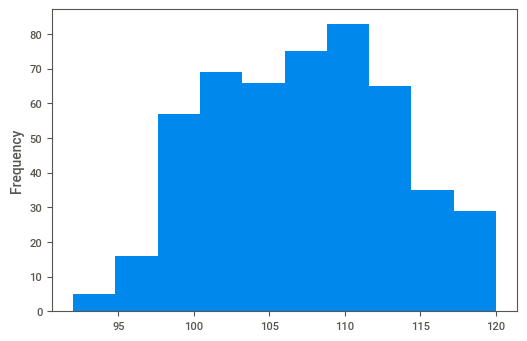

In [ ]:
admissions_df_new['TOEFL_SC'].plot(kind="hist")

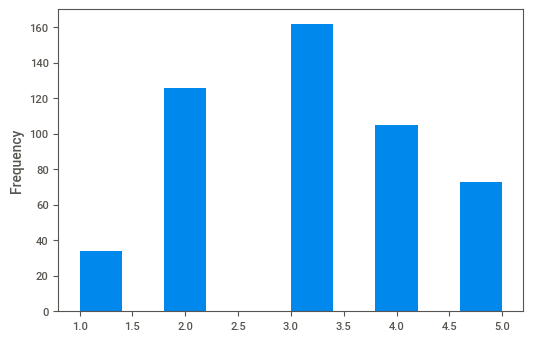

In [ ]:
admissions_df_new['Uni_rate'].plot(kind="hist")

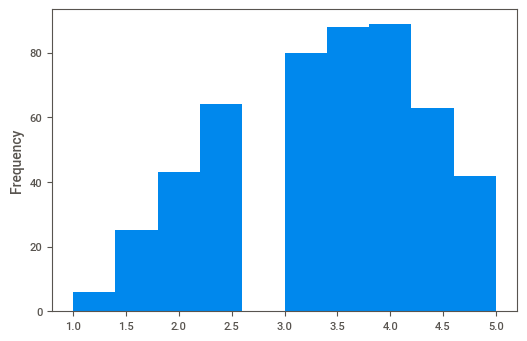

In [ ]:
admissions_df_new['SOP'].plot(kind="hist")

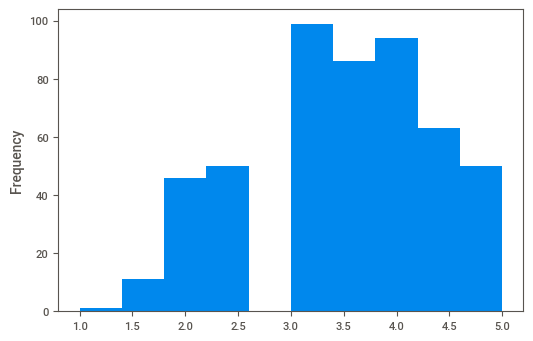

In [ ]:
admissions_df_new['LOR'].plot(kind="hist")

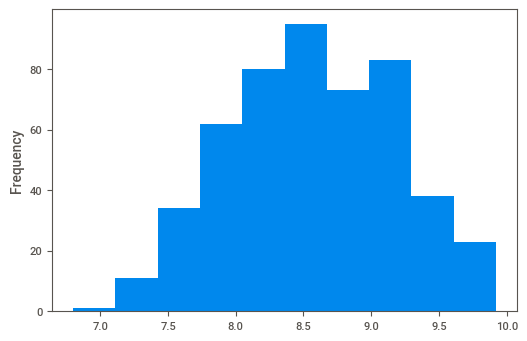

In [ ]:
admissions_df_new['CGPA'].plot(kind="hist")

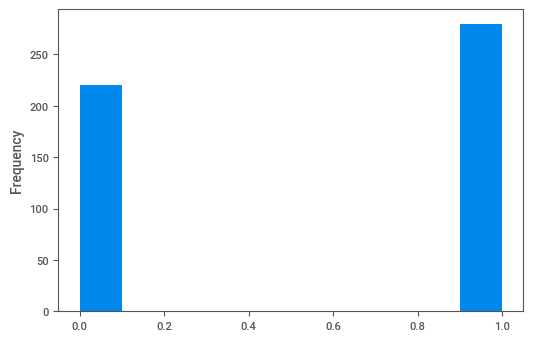

In [ ]:
admissions_df_new['Research'].plot(kind="hist")

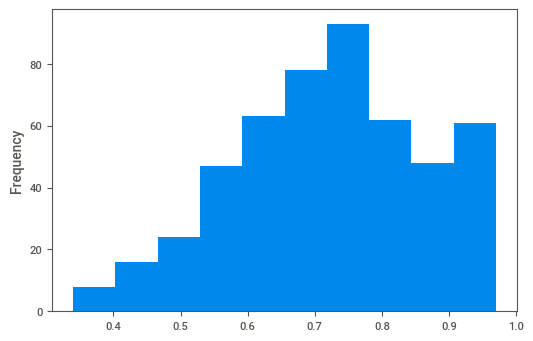

In [ ]:
admissions_df_new['Chance_of_admit'].plot(kind="hist")

**EDA CONCLUSIONS** 
The original columns of the data was written in a way that would be problematic for data analysis. To fix it, the columns were renamed. Data from the 'Research' and 'Chance to admit' colums was retrived. The 'Research' column data is categorical and can be easily mistaken for numeric data. The 'Chance to admit' column contained numeric data. 

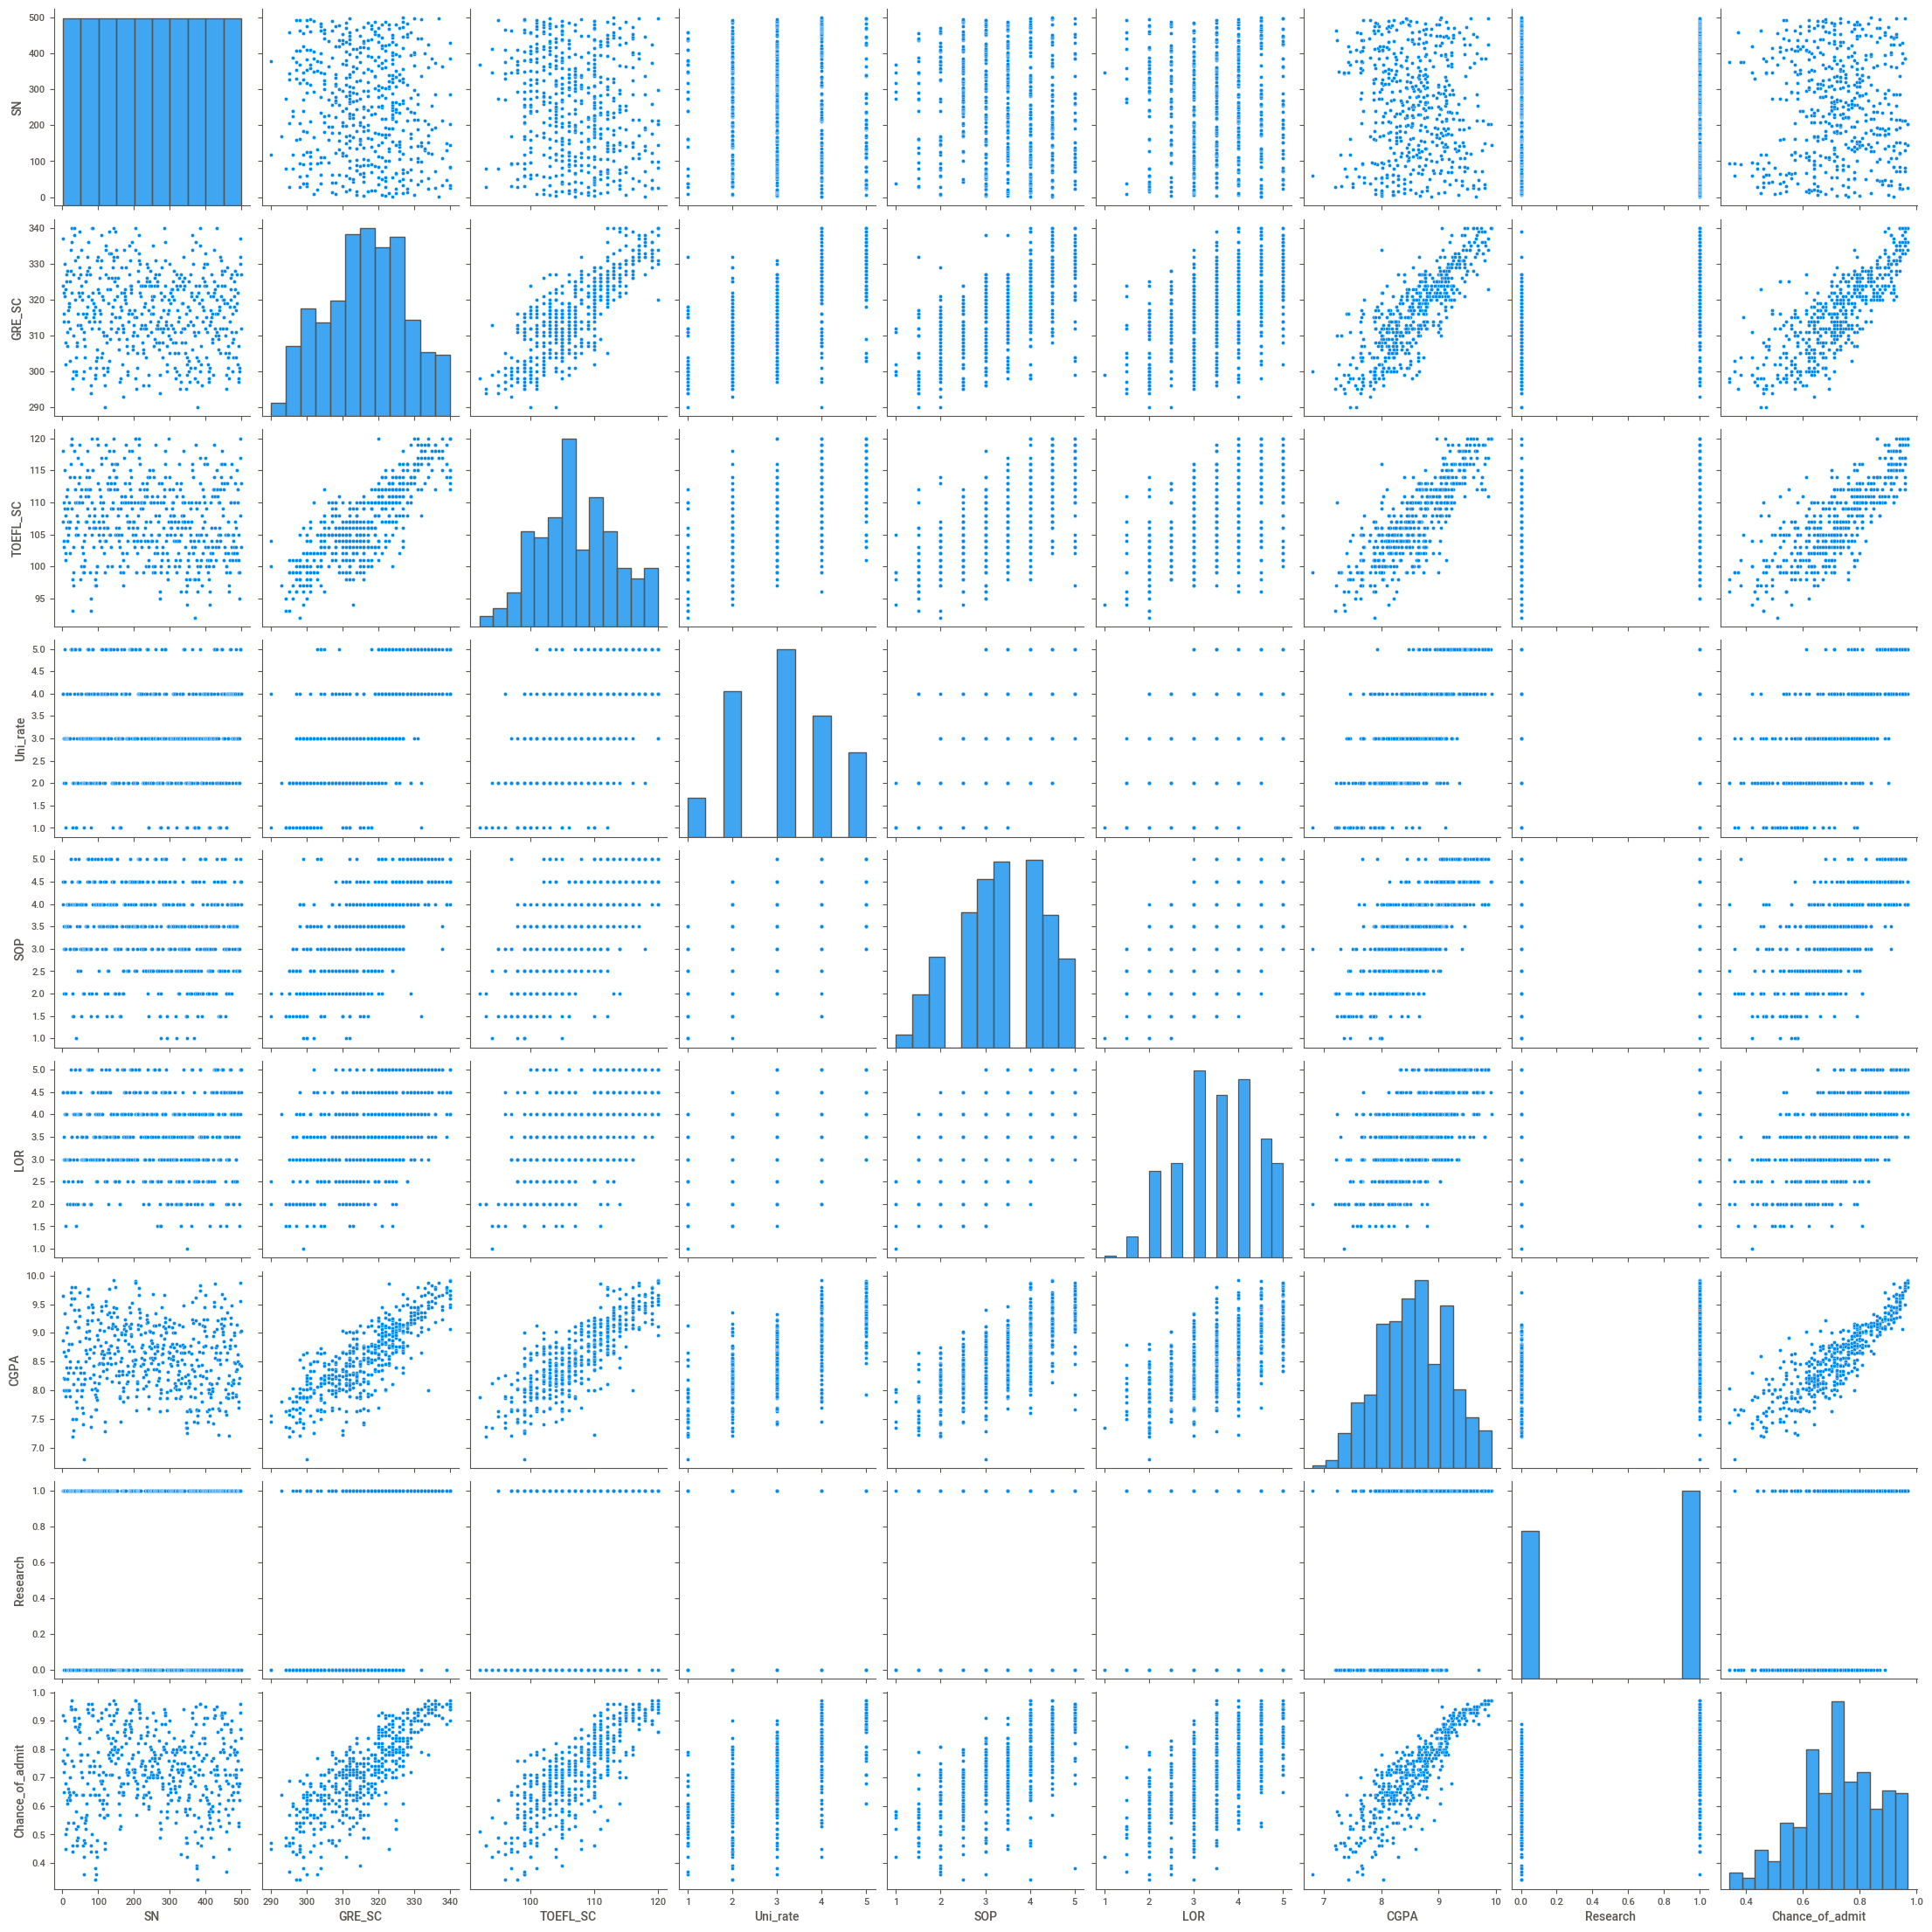

In [ ]:
sns.pairplot(admissions_df_new)

In [ ]:
admissions_df_new.corr()

,SN,GRE_SC,TOEFL_SC,Uni_rate,SOP,LOR,CGPA,Research,Chance_of_admit
SN,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_SC,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_SC,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Uni_rate,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


**Division of data**
This stage lets us divide the data into test and train data for the machine learning model.

In [ ]:
admissions_df_new.columns 

Index(['SN', 'GRE_SC', 'TOEFL_SC', 'Uni_rate', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_admit'],
      dtype='object')

In [ ]:
# creating features and target variable
X = admissions_df_new [['GRE_SC', 'TOEFL_SC','Uni_rate', 'SOP', 'LOR', 'CGPA', 'Research' ]]
y = admissions_df_new [['Chance_of_admit']].copy()

In [ ]:
# splitting data randomly into 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (400, 7)
Shape of X_test=> (100, 7)
Shape of Y_train=> (400, 1)
Shape of Y_test=> (100, 1)


In [ ]:
# calling decision tree regressor because the taget feature is a numeric variable rather than a categorical variable, which classifies
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor( random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
#visualising the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
dt.score(X_train, y_train)

1.0

In [ ]:
dt.score(X_test,y_test)

0.57799511002445

**Overfitting**
Based on the values of our dt.scores, the train score has a perfect value of 1, while the test score has a value of 0.57799. This is one of the disadvantages of decision trees as the model can sometimes overfit the data, especially in this case when the data size is small. This means that the model cannot be generalised. 